In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 준비 (데이터 셋은 판다스에서 가져옴)

In [ ]:
df_dataset = pd.read_csv('heart.csv')

In [ ]:
print(df_dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
print(df_dataset[:3])

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  


In [ ]:
print(df_dataset.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [ ]:
from sklearn.model_selection import train_test_split

결괏값인 target 칼럼명을 drop 함

In [ ]:
X = df_dataset.drop(columns=['target'])
y = df_dataset['target']

트레인 : 테스트 = 8 : 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

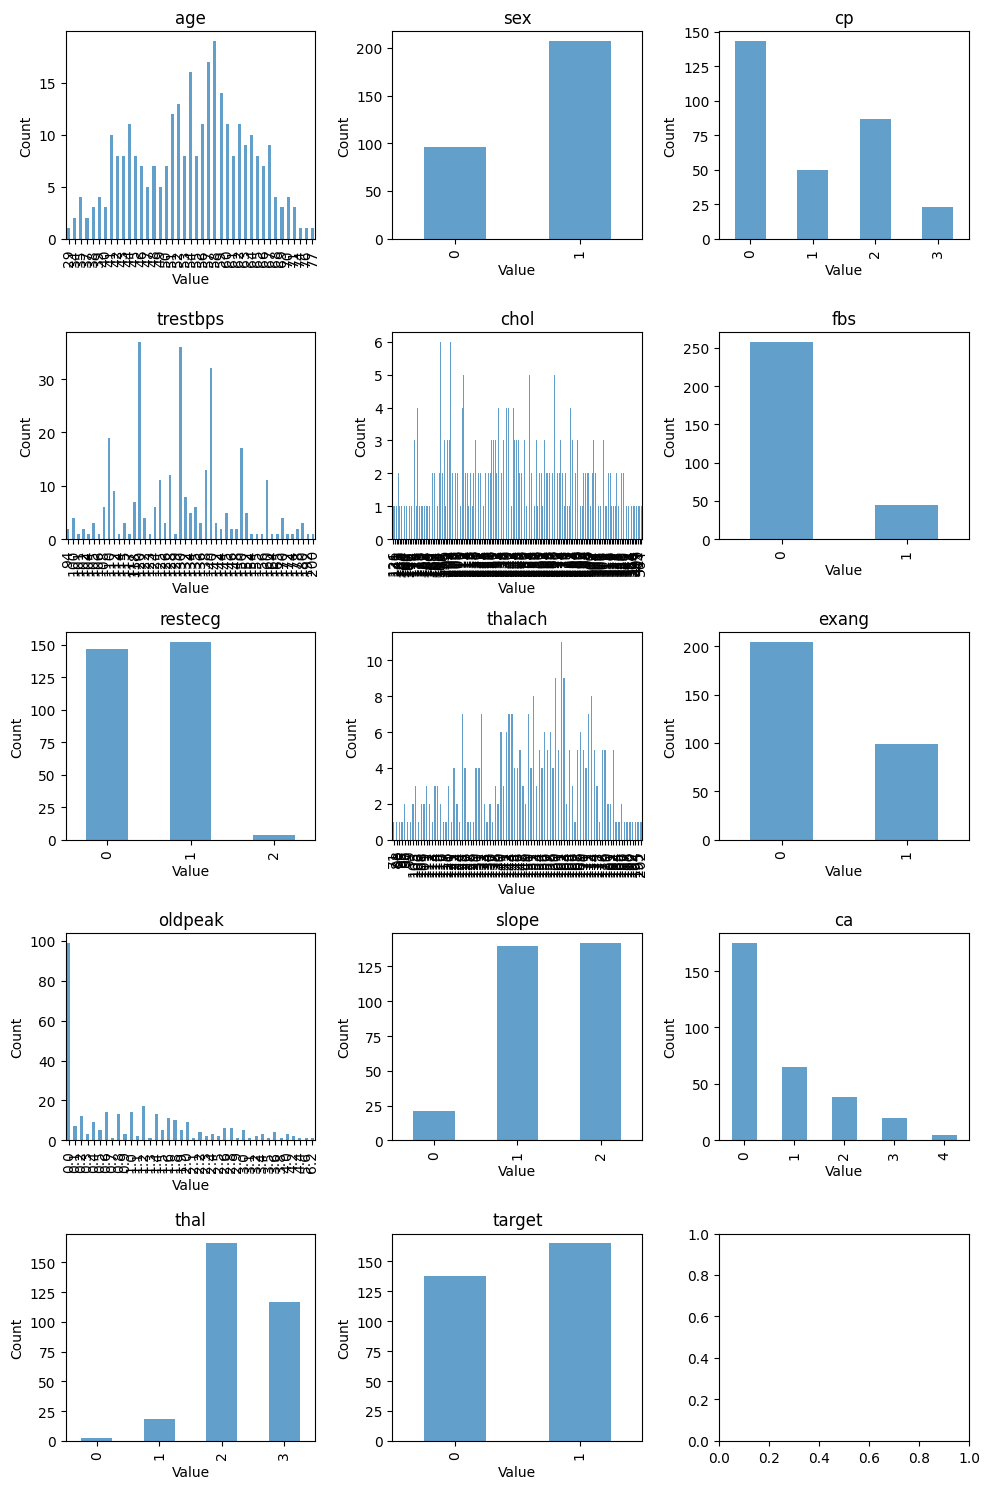

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 15))
axes = axes.flatten()

for i, col in enumerate(df_dataset.columns):
    df_dataset[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

<ipython-input-20-d12df5681efe>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dataset, x="exang", y="thalach", palette="pastel")


Text(0.5, 1.0, 'Heart Rate by Exercise Induced Angina')

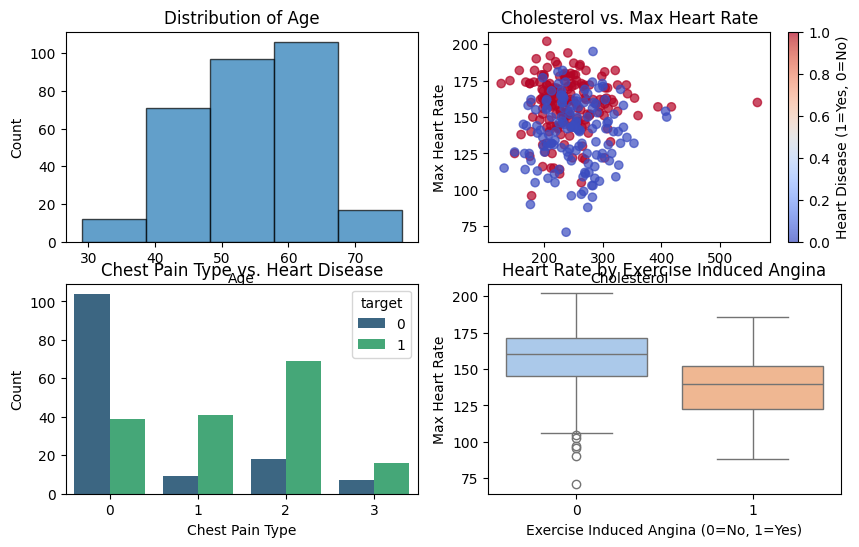

In [ ]:
plt.figure(figsize=(10, 6))

# 1. 연령 분포 히스토그램
plt.subplot(2, 2, 1)
plt.hist(df_dataset["age"], bins=5, edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")

# 2. 콜레스테롤과 최대 심박수의 관계 (산점도)
plt.subplot(2, 2, 2)
plt.scatter(df_dataset["chol"], df_dataset["thalach"], c=df_dataset["target"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Cholesterol")
plt.ylabel("Max Heart Rate")
plt.title("Cholesterol vs. Max Heart Rate")
plt.colorbar(label="Heart Disease (1=Yes, 0=No)")

# 3. 가슴 통증 유형(cp) 별 심장병(target) 비율 (막대 그래프)
plt.subplot(2, 2, 3)
sns.countplot(data=df_dataset, x="cp", hue="target", palette="viridis")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Chest Pain Type vs. Heart Disease")

# 4. 운동 유발 협심증(exang) 여부에 따른 심박수 분포 (박스 플롯)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_dataset, x="exang", y="thalach", palette="pastel")
plt.xlabel("Exercise Induced Angina (0=No, 1=Yes)")
plt.ylabel("Max Heart Rate")
plt.title("Heart Rate by Exercise Induced Angina")

In [ ]:
from sklearn.preprocessing import StandardScaler

훈련 세트와 테스트 세트를 변환

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

모델 훈련 및 평가 (k - 최근접 이웃)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

모델 예측하기

In [ ]:
y_pred = knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
knn.score(X_test_scaled, y_test)

0.8032786885245902

In [ ]:
new = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
new_scaled = scaler.transform(new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = knn.predict(new_scaled)

In [ ]:
print(f'예측 결과 (0: No Disease, 1: Disease): {prediction[0]}')

예측 결과 (0: No Disease, 1: Disease): 1
